In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

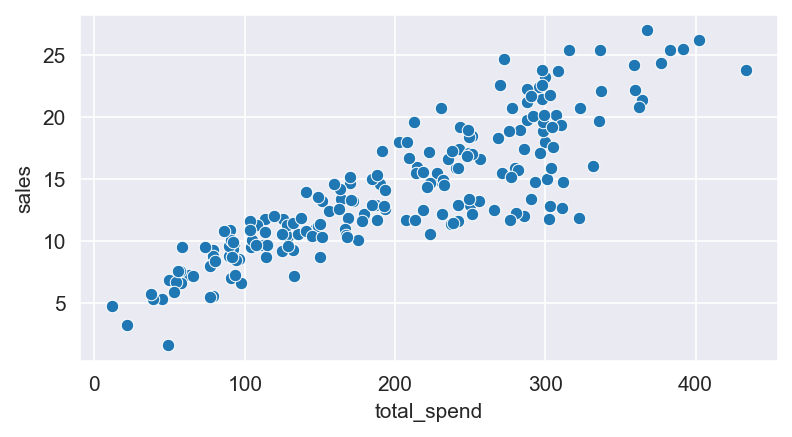

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,3), dpi=150)
sns.scatterplot(data=df, x='total_spend',y='sales')
# видно, что зависимость есть

<Axes: xlabel='total_spend', ylabel='sales'>

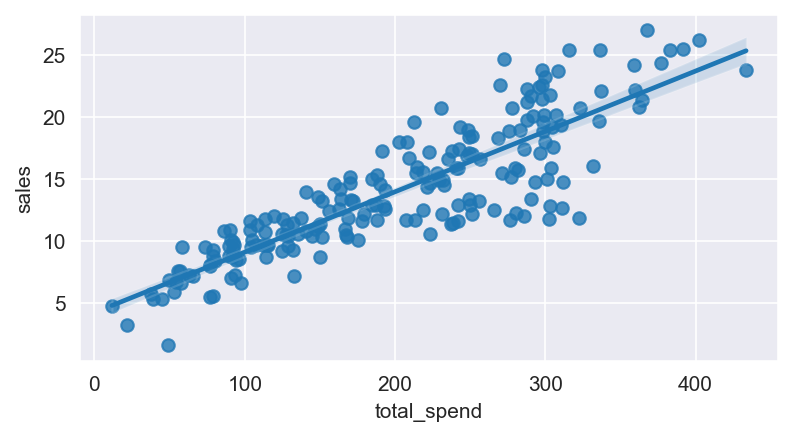

In [6]:
# есть график, который не рассматривался - это regplot - построит график линейной регрессии с помощью наименьших квадратов
plt.figure(figsize=(6,3), dpi=150)
sns.regplot(data=df, x='total_spend', y="sales")
# как можно самостоятельно вычислить такую линию?

In [9]:
# Как самостоятельно считать такую линию
# Разделим данные на x и y 

X = df["total_spend"] # пишем большую X для единообразия
y = df["sales"]

In [13]:
# degree = 1 тк строим линейную регрессию y = mx + b => y = B1*x + B0
# help(np.polyfit)
np.polyfit(X, y, deg=1)
# получаем коэффы B1, B0

array([0.04868788, 4.24302822])

In [14]:
# чтобы нарисовать линию нарисуем набор точек
potential_spend = np.linspace(0, 500, 100) #сгенерить в диапазоне от 0 до 500 сто точек

In [15]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

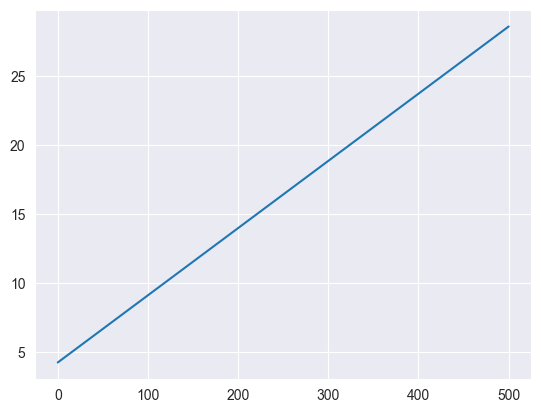

In [16]:
# получаем линию регрессии
plt.plot(potential_spend, predicted_sales)

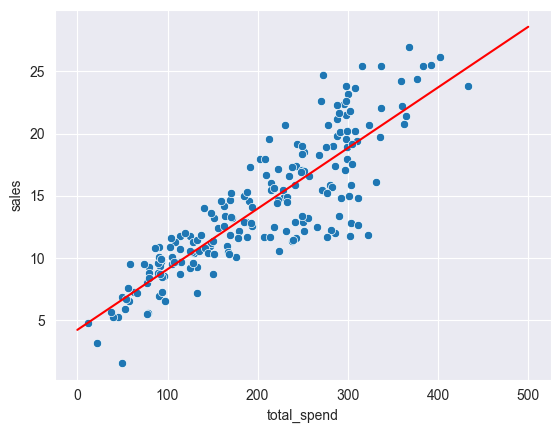

In [17]:
# проверяем построенную линию регрессии
sns.scatterplot(data=df, x="total_spend", y="sales")
plt.plot(potential_spend, predicted_sales, color="red")

In [18]:
# также используя degree мы можем возводить X в степень
np.polyfit(X, y, deg=3)
# 1 - коэфф для x^3, 2 - для x^2, 3 - для x, 4 - константа

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [ ]:
# y = B1 * x + B0 - это было раньше
# y  B3*x^3 + B2*x^2 + B1*x + B0
# как видим, коэфф B3 для x^3 очень маленькое значение => мало влияет на результат => потребность в нем мала

In [24]:
potential_spend2 = np.linspace(0, 500, 100)
predicted_sales2 =  3.07615033e-07 * potential_spend2**3    + \
                    -1.89392449e-04 * potential_spend2**2   + \
                    8.20886302e-02 * potential_spend2       + \
                    2.70495053e+00

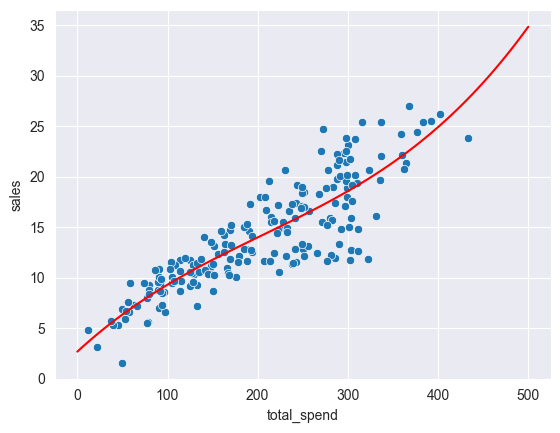

In [25]:
# проверяем построенную линию регрессии
sns.scatterplot(data=df, x="total_spend", y="sales")
plt.plot(potential_spend2, predicted_sales2, color="red")

In [ ]:
# далее будем обсуждать, какой из методов лучше